In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

In [72]:
from google.colab import files
uploaded = files.upload()

Saving y_test.csv to y_test (1).csv
Saving y_train.csv to y_train (1).csv


In [74]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_X_test.csv to cleaned_X_test (2).csv
Saving cleaned_X_train.csv to cleaned_X_train (1).csv


In [0]:
Xtrain = pd.read_csv('cleaned_X_train.csv')
Xtest = pd.read_csv('cleaned_X_test.csv')
ytrain = pd.read_csv('y_train.csv')
ytest = pd.read_csv('y_test.csv')
X_train = np.concatenate((np.ones((Xtrain.shape[0],1)),Xtrain),axis=1)
X_test = np.concatenate((np.ones((Xtest.shape[0],1)),Xtest),axis=1)
ytrain = ytrain.values.reshape(ytrain.shape[0])
ytest = ytest.values.reshape(ytest.shape[0])

In [0]:
WALKING = 1    
WALKING_UPSTAIRS = 2  
WALKING_DOWNSTAIRS = 3
SITTING = 4
STANDING = 5       
LAYING = 6      
STAND_TO_SIT = 7      
SIT_TO_STAND = 8  
SIT_TO_LIE = 9  
LIE_TO_SIT = 10    
STAND_TO_LIE = 11   
LIE_TO_STAND = 12
act = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]

In [0]:
def Leval(beta,X,y):
    z = X@beta
    h = 1/(1+np.exp(-z))
    L = np.sum((1-y)*z - np.log(h))
    Lgrad = (X.T)@(h-y)
    return L, Lgrad

In [0]:
y = (ytrain == WALKING).astype(int)
yt = (ytest == WALKING).astype(int)

In [0]:
def grad_opt_simp(grad_func, beta0, lr=1e-3,nit=1000):
    hist = {'beta': [], 'L': []}
    beta = beta0

    for it in range(nit):
        L, Lgrad = grad_func(beta)
        beta = beta - lr*Lgrad
        hist['L'].append(L)
        hist['beta'].append(beta)

    for elem in ('L', 'beta'):
        hist[elem] = np.array(hist[elem])
    return beta, L, hist

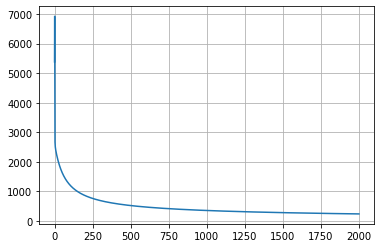

In [180]:
p = X_train.shape[1]
beta0 = np.zeros(p)
Leval_param = lambda beta: Leval(beta,X_train,y)
nit = 2000
lr = 1e-5
beta, L, hist = grad_opt_simp(Leval_param, beta0, lr=lr, nit=nit)

t = np.arange(nit)
plt.plot(t, hist['L'])
plt.grid()

In [0]:
def predict(X,beta):
    z = X@beta
    yhat = (z > 0)
    return (1*yhat)

In [0]:
acc_result = []
grad_result = []
p = X_train.shape[1]
beta0 = np.zeros(p)
nit = 2000
lr = 1e-5
for i in range(1,13):
  y = (ytrain == i).astype(int)
  yt = (ytest == i).astype(int)
  Leval_param = lambda beta: Leval(beta,X_train,y)
  beta, L, hist = grad_opt_simp(Leval_param, beta0, lr=lr, nit=nit)
  grad_result.append((beta,L,hist))

  yhat = predict(X_test,beta)
  acc = np.mean(yhat == yt)
  acc_result.append(acc)

In [198]:
for i in range(len(acc_result)):
  print("accuracy for ",act[i],":",acc_result[i])

accuracy for  WALKING : 0.9889275545713382
accuracy for  WALKING_UPSTAIRS : 0.9560265738690288
accuracy for  WALKING_DOWNSTAIRS : 0.9750079088895919
accuracy for  SITTING : 0.9667826637140146
accuracy for  STANDING : 0.9667826637140146
accuracy for  LAYING : 0.9993672888326479
accuracy for  STAND_TO_SIT : 0.9930401771591268
accuracy for  SIT_TO_STAND : 0.9987345776652958
accuracy for  SIT_TO_LIE : 0.9927238215754508
accuracy for  LIE_TO_SIT : 0.994305599493831
accuracy for  STAND_TO_LIE : 0.9892439101550142
accuracy for  LIE_TO_STAND : 0.9917747548244227
